In [1]:
# ============================================================
# Notebook setup
# ============================================================

%load_ext autoreload
%autoreload 2

# Control figure size
interactive_figures = False
if interactive_figures:
    %matplotlib widget
    figsize=(9, 3)
else:
    figsize=(14, 4)

from util import util

# Epidemic Control

## Epidemic Control

**As our next case study we will consider an _epidemic control_ problem**

<center><img src="assets/network.jpeg" width=60% /></center>

* Let's assume we are at _early stages_ of an epidemic
* ...And we want to do our best to control while we wait for a cure/vaccine

## Epidemic Control as Optimization

**Technically, this is an _optimization_ problem**

* We need to decide _which actions to take_
* ...Subject to a variety of _constraints_ (e.g. socio economical impact)
* ...So that the total number of infected is _minimized_

> **But how do we evaluate the impact of our actions?**

## Epidemic Control as Optimization

**Epidemical dynamics can be simulated**

* We can use _differential equations_
* We can use _multi-agent_ models
* We can use _network models_ to account for connections

**However, even if simulators are defined via well-known rules and equations**

...Using these in declarative optimization is typically _very difficult_

* A multi-agent simulator may have too many agents
* A differential equation may introduce too many non-linearities
* ...And both may need to run for too many steps

**Black-box optimization is an option, but it cannot deal easily with _constraints_**

## Optimizing over ML Models

**We will tackle this problem by _combining ML and optimization_**

In particular, we will use ML to model _part_ of our optimization problem

* In particular, we will learn a ML model as usual
* Then we will find a way _encode_ it into a given optimization technology
* Finally, we will optimiza as usual

**The approach was formalized in 2011 (the [main reference](https://cris.unibo.it/retrieve/e1dcb338-45bc-7715-e053-1705fe0a6cc9/eml_aij.pdf) is more recent)**

...And it is designed to enable optimization over complex real-world systems

* Traffic optimization
* Thermal aware (computational) job scheduling
* Design of incentive schemes
* Promo fund optimization
* ...

## Our Simulator

**For our use case we will use a SIR model as a simulator**

SIR models are a type of _compartmental model_

* The population is divided into three groups (compartments)
* ...I.e. Susceptibles, Infected, Recovered

**The classical SIR model is a _dynamic system_**

* The size of the three groups evolves over time
* According to an Ordinary Differemtial Equation (ODE)

**An ODE is a differential equation in the form:**
$$
\dot{y} = f(y, t)
$$

* $y$ is a (vector) variable representing the system state
* $f(y, t)$ defines the _gradient_ of the state

## SIR Model

**In the case of the SIR model, we have:**

$$\begin{align}
\dot{S} & = -\beta \frac{1}{N}SI \\
\dot{I} & = \beta \frac{1}{N}SI - \gamma I \\
\dot{R} & = \gamma I
\end{align}$$

Where:

* $S$, $I$, $R$ refer to the size of each component
* $N$ is the population size (i.e. $N = S + I + R$
* ...$\beta$ is the _infection rate_ and $\gamma$ the _recovery rate_
* ...And the ratio $R_0 = \beta / \gamma$ is called _basic reproductive number_

## SIR Model

**In the case of the SIR model, we have:**

$$\begin{align}
\dot{S} & = -\beta \frac{1}{N}SI \\
\dot{I} & = \beta \frac{1}{N}SI - \gamma I \\
\dot{R} & = \gamma I
\end{align}$$

We have that:

* $S$ decreases proportionally to the product $S I$
* $I$ grows by the same rate, and decreases proportionally to its size $I$
* $R$ grows proportionally to $I$

Individiduals "flow" from $S$ to $I$, and then to $R$

## Running Our Simulator

**A SIR model simulator is available in our `util` module**

In order to run it, we need to define test values for all parameters

In [10]:
S0, I0, R0 = 0.99, 0.01, 0.0
beta, gamma = 0.1, 1/14
tmax = 365

* We consider a normalized population ($N = 1$)
* Initially, $1\%$ of the population is infected
* $\gamma$ is the inverse of the average recovery time (14 days)
* We simulate for one year

**The value of $R_0$ determines whether we have a proper epidemic behavior**

* If $R_0 > 1$ infections grow before falling, otherwise they only decrease
* We have $R_0 = \beta / \gamma = 1.4$, i.e. a true epidemic behavior

## Running Our Simulator

**Let's plot the dynamics for one year**

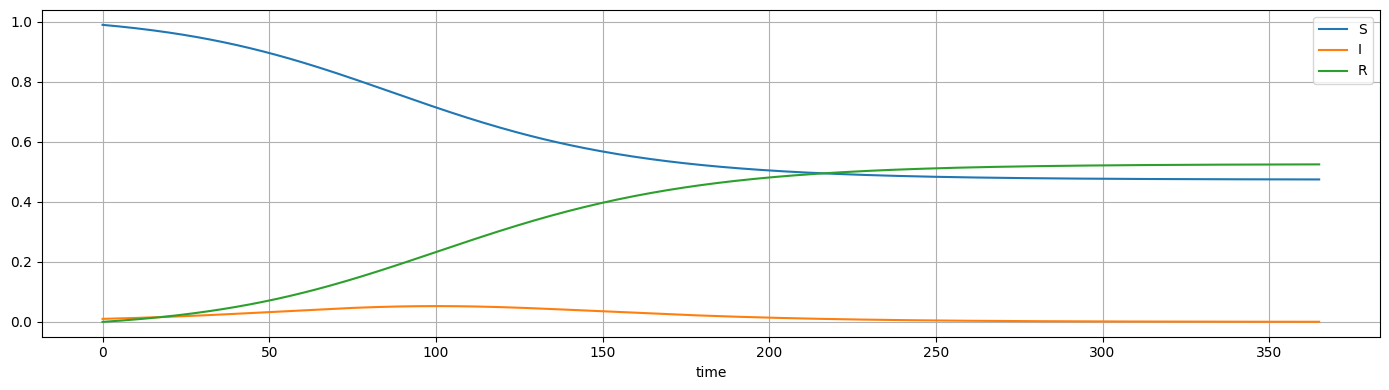

In [11]:
data = util.simulate_SIR(S0, I0, R0, beta, gamma, tmax=tmax, steps_per_day=1)
util.plot_df_cols(data, figsize=figsize)

* The $S$ compartment monotonically decreases
* The $R$ compartment monotonically increases

## Running Our Simulator

**Let's focus on the infected curve**

The number of infected grows, before decreasing again

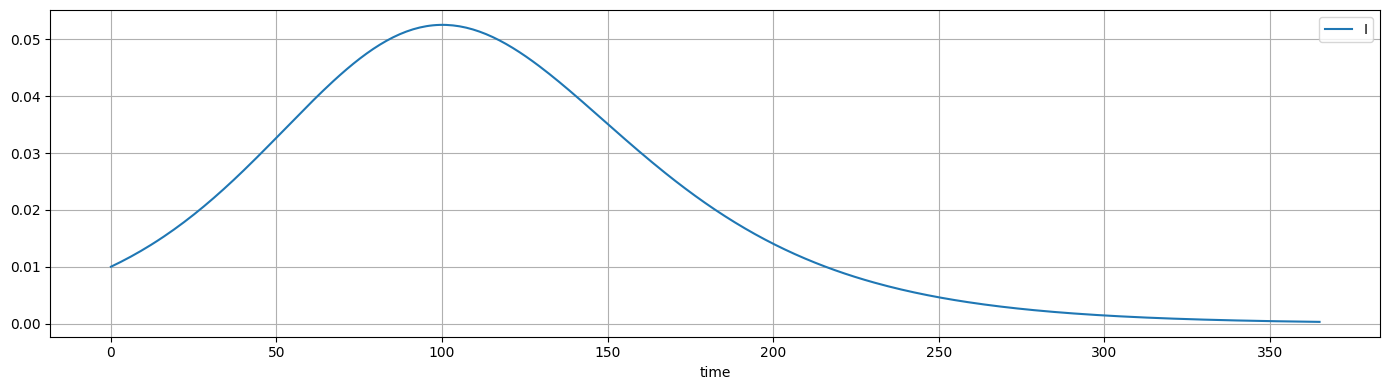

In [12]:
util.plot_df_cols(data[['I']], figsize=figsize)

* In a true epidemics, the behavior will be more complicated
* ...In particular, we will typically have multiple waves

## Running Our Simulator

**Let's focus on the infected curve**

The number of infected grows, before decreasing again

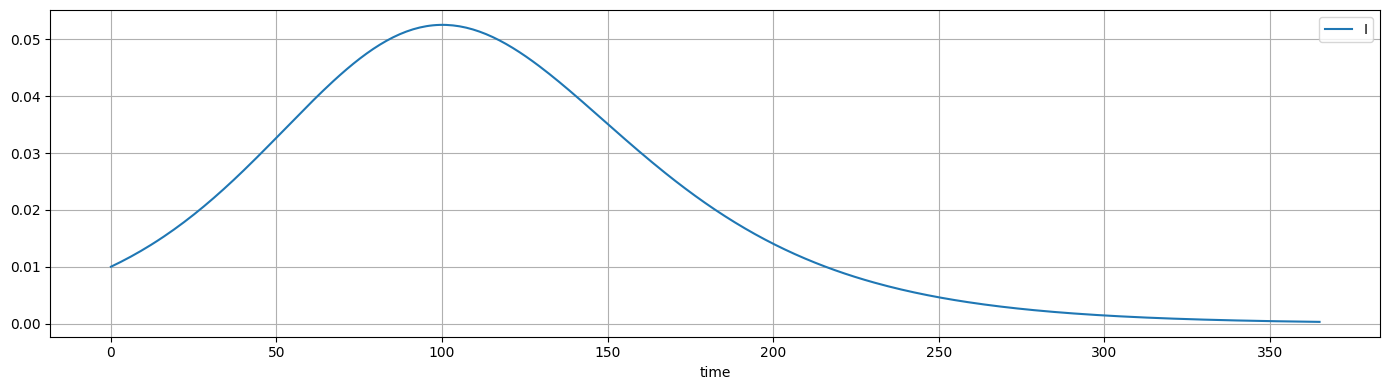

In [13]:
util.plot_df_cols(data[['I']], figsize=figsize)

* However, SIR models are still a good _local_ descriptor
* ...Which is why the $R_t$ values is routinely monitored